<a href="https://colab.research.google.com/github/Andrei198203/new3_1_final-project/blob/main/new_3_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#!pip install tensorflow

In [2]:
import pandas as pd
from string import punctuation
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.utils import to_categorical, plot_model
#from keras.optimizers import Adam
from keras.datasets import fashion_mnist
from keras import models, layers, optimizers, utils
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization, Dense, Dropout, Flatten, ELU, LeakyReLU, Input
from tensorflow.keras.optimizers import RMSprop, SGD, Adam
from tensorflow.keras.regularizers import l2
# from keras.preprocessing  import  image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# import h5py

In [3]:
from tensorflow.keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [4]:
print('x_train Shape: {}'.format(x_train.shape))
print('x_test Shape: {}'.format(x_test.shape))
print('y_train Shape: {}'.format(y_train.shape))
print('y_test Shape: {}'.format(y_test.shape))

x_train Shape: (50000, 32, 32, 3)
x_test Shape: (10000, 32, 32, 3)
y_train Shape: (50000, 1)
y_test Shape: (10000, 1)


In [5]:
num_classes = 10
classes = { 0:"airplane(літак)",
            1: "automobile(автомобіль)",
            2: "bird(птах)",
            3: "cat(кот)",
            4: "deer(олень)",
            5: "dog(пес)",
            6: "frog(жаба)",
            7: "horse(кінь)",
            8: "ship(корабель)",
            9: "truck(вантажівка)"}

In [6]:
# set up image augmentation
datagen = ImageDataGenerator(
    rotation_range=15,
    horizontal_flip=True,
    width_shift_range=0.15,
    height_shift_range=0.15,
    zoom_range=0.3
    )
datagen.fit(x_train)

In [7]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train = np.array(x_train) / 255.0
x_test = np.array(x_test) / 255.0

# Convert tags to categories


y_train = utils.to_categorical(y_train, num_classes)
y_test = utils.to_categorical(y_test, num_classes)

print(f"x_train: {x_train.shape}, x_test: {x_test.shape}\ny_train: {y_train.shape}, y_test: {y_test.shape}")

x_train: (50000, 32, 32, 3), x_test: (10000, 32, 32, 3)
y_train: (50000, 10), y_test: (10000, 10)


In [8]:
reg = None
reg2 = None
num_filters = 32
ac = 'relu'
drop_dense = 0.5
drop_conv = 0.2
input_shape = (32, 32, 3)
num_classes = 10  # Обов'язково задайте кількість класів для вихідного шару

model = Sequential(name='cifar10_improved')

# Використання Input як першого шару
model.add(Input(shape=input_shape))

# Слой 2D-свертки
model.add(Conv2D(num_filters, (3, 3), kernel_regularizer=reg, padding='same'))
model.add(BatchNormalization(axis=-1))
model.add(LeakyReLU(negative_slope=0.1))
model.add(Conv2D(num_filters, (3, 3), kernel_regularizer=reg, padding='same'))
model.add(BatchNormalization(axis=-1))
model.add(LeakyReLU(negative_slope=0.1))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(drop_conv))

model.add(Conv2D(2 * num_filters, (3, 3), kernel_regularizer=reg, padding='same'))
model.add(BatchNormalization(axis=-1))
model.add(LeakyReLU(negative_slope=0.1))
model.add(Conv2D(2 * num_filters, (3, 3), kernel_regularizer=reg, padding='same'))
model.add(BatchNormalization(axis=-1))
model.add(LeakyReLU(negative_slope=0.1))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(drop_conv))

model.add(Conv2D(4 * num_filters, (3, 3), kernel_regularizer=reg, padding='same'))
model.add(BatchNormalization(axis=-1))
model.add(LeakyReLU(negative_slope=0.1))
model.add(Conv2D(4 * num_filters, (3, 3), kernel_regularizer=reg, padding='same'))
model.add(BatchNormalization(axis=-1))
model.add(LeakyReLU(negative_slope=0.1))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(drop_conv))

model.add(Flatten())
model.add(Dense(2048, kernel_regularizer=reg2, name='hidden_1'))
model.add(BatchNormalization())
model.add(LeakyReLU(negative_slope=0.1))
model.add(Dropout(drop_dense))
model.add(Dense(2048, kernel_regularizer=reg2, name='hidden_2'))
model.add(BatchNormalization())
model.add(LeakyReLU(negative_slope=0.1))
model.add(Dropout(drop_dense))
model.add(Dense(1024, kernel_regularizer=reg2, name='hidden_4'))
model.add(BatchNormalization())
model.add(LeakyReLU(negative_slope=0.1))
model.add(Dropout(drop_dense))
model.add(Dense(512, kernel_regularizer=reg2, name='hidden_5'))
model.add(BatchNormalization())
model.add(LeakyReLU(negative_slope=0.1))
model.add(Dropout(drop_dense))
model.add(Dense(num_classes, activation='softmax', name='output'))

In [9]:
model.summary()

Model: "cifar10_improved"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 32, 32, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 32, 32, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu (LeakyReLU)              │ (None, 32, 32, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 32, 32, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 32, 32, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_1 (LeakyReLU)            │ (None, 32, 32, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 16, 16, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 16, 16, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_2 (LeakyReLU)            │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 16, 16, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 16, 16, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_3 (LeakyReLU)            │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 8, 8, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 8, 8, 128)           │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_4 (LeakyReLU)            │ (None, 8, 8, 128)           │              

 Total params: 11,332,138 (43.23 MB)

 Trainable params: 11,319,978 (43.18 MB)

 Non-trainable params: 12,160 (47.50 KB)

In [10]:
# Компиляция модели с измененными параметрами оптимизатора Adam
opt = Adam(learning_rate=0.0005)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

In [13]:
history=model.fit( x_train, y_train,
                  batch_size=256,
                  steps_per_epoch = int(len(x_train) / 256),
                  epochs=50,
                  validation_data=(x_test, y_test) )

Epoch 1/50
195/195 ━━━━━━━━━━━━━━━━━━━━ 342s 2s/step - accuracy: 0.2880 - loss: 2.1091 - val_accuracy: 0.1049 - val_loss: 4.8507
Epoch 2/50
  1/195 ━━━━━━━━━━━━━━━━━━━━ 2:01 626ms/step - accuracy: 0.4250 - loss: 1.5508

C:\Program Files\Python311\Lib\contextlib.py:155: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


195/195 ━━━━━━━━━━━━━━━━━━━━ 11s 52ms/step - accuracy: 0.4250 - loss: 1.5508 - val_accuracy: 0.1068 - val_loss: 4.9198
Epoch 3/50
195/195 ━━━━━━━━━━━━━━━━━━━━ 281s 1s/step - accuracy: 0.4809 - loss: 1.4236 - val_accuracy: 0.2176 - val_loss: 3.5273
Epoch 4/50
195/195 ━━━━━━━━━━━━━━━━━━━━ 9s 45ms/step - accuracy: 0.6250 - loss: 1.2236 - val_accuracy: 0.2153 - val_loss: 3.5552
Epoch 5/50
195/195 ━━━━━━━━━━━━━━━━━━━━ 391s 2s/step - accuracy: 0.5858 - loss: 1.1554 - val_accuracy: 0.5318 - val_loss: 1.4378
Epoch 6/50
195/195 ━━━━━━━━━━━━━━━━━━━━ 15s 72ms/step - accuracy: 0.7250 - loss: 0.9681 - val_accuracy: 0.5403 - val_loss: 1.4218
Epoch 7/50
195/195 ━━━━━━━━━━━━━━━━━━━━ 452s 2s/step - accuracy: 0.6444 - loss: 0.9969 - val_accuracy: 0.6457 - val_loss: 1.0474
Epoch 8/50
195/195 ━━━━━━━━━━━━━━━━━━━━ 16s 76ms/step - accuracy: 0.6375 - loss: 1.1233 - val_accuracy: 0.6410 - val_loss: 1.0623
Epoch 9/50
195/195 ━━━━━━━━━━━━━━━━━━━━ 450s 2s/step - accuracy: 0.6896 - loss: 0.8736 - val_accuracy: 0.

In [14]:
result_test = model.evaluate(x_test, y_test)
result_train = model.evaluate(x_train, y_train)
print("Percentage of test data accuracy: ", round(result_test[1] * 100, 2))
print("Percentage of training data accuracy: ", round(result_train[1] * 100, 2))

313/313 ━━━━━━━━━━━━━━━━━━━━ 24s 77ms/step - accuracy: 0.8433 - loss: 0.4879
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 117s 75ms/step - accuracy: 0.9576 - loss: 0.1306
Percentage of test data accuracy:  84.17
Percentage of training data accuracy:  95.79


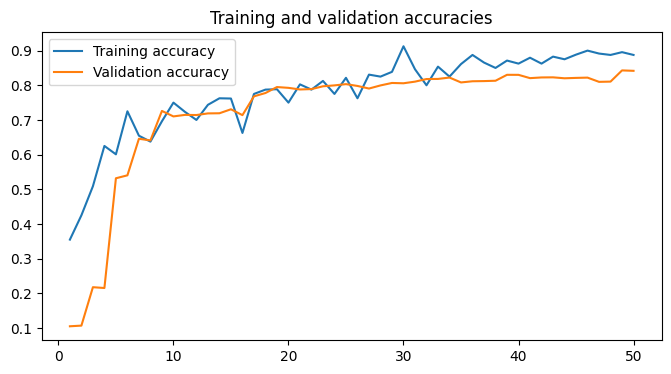

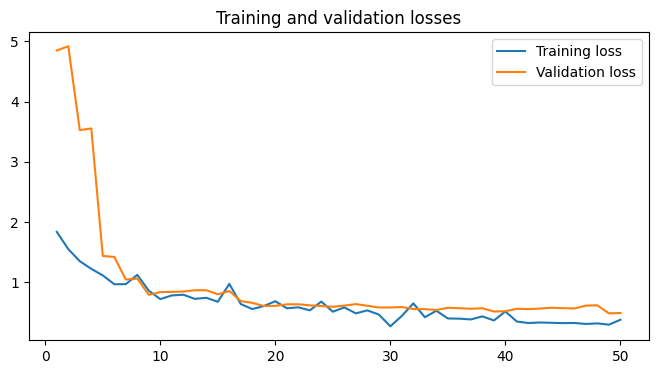

In [15]:
epochs = range(1, len(history.history["accuracy"]) + 1)

plt.figure(figsize=(8, 4))
plt.plot(epochs, history.history["accuracy"],   label="Training accuracy")
plt.plot(epochs, history.history["val_accuracy"], label="Validation accuracy")
plt.title("Training and validation accuracies")
plt.legend()
plt.figure(figsize=(8, 4))
plt.plot(epochs, history.history["loss"],  label="Training loss")
plt.plot(epochs, history.history["val_loss"], label="Validation loss")
plt.title("Training and validation losses")
plt.legend()
plt.show()

In [16]:
model.save("basesd_model.hdf5")

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
Клас номер: 7
Клас img : horse(кінь)


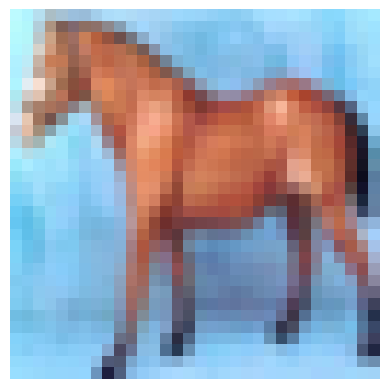

In [17]:
imege_number = 1170

x = np.expand_dims(x_test[imege_number], axis=0)
prediction = model.predict(x)
prediction = np.argmax(prediction[0])

# classes[y_train[imege_number][0]]
plt.axis('off')

plt.imshow(x_test[imege_number] ,  cmap=plt.cm.binary)

print(f"Клас номер: {prediction}")
print(f"Клас img : {classes[prediction]}")